In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
data_i = pd.ExcelFile('temp2.xlsx')

In [3]:
data_img = pd.read_excel(data_i) 

In [4]:
data0 = data_img[0:400] 
data2 = data_img[400:500]
data1 = data_img[500:900] 
data3 = data_img[900:1000]
data4 = data_img[1000:1400] 
data5 = data_img[1400:1500]
data6 = data_img[1500:1900] 
data7 = data_img[1900:2000]
data8 = data_img[2000:2400] 
data9 = data_img[2400:2500]
data10 = data_img[2500:2900]
data11 = data_img[2900:3000]
data12 = data_img[3000:3400]
data13 = data_img[3400:3500]
data14 = data_img[3500:3900]
data15 = data_img[3900:4000]
data16 = data_img[4000:4400]
data17= data_img[4400:4500]
data18 = data_img[4500:4900]
data19 = data_img[4900:5000]

data_training = pd.concat([data0 , data1 , data4 , data6 , data8 , data10 , data12 , data14 , data16 , data18],axis = 0)
data_testing = pd.concat([data2 , data3 , data5 , data7 , data9 , data11 , data13 , data15 , data17 , data19],axis = 0)
# data_challenge = data4.append(data5)
data_training = data_training.sample(frac=1)
data_testing = data_testing.sample(frac=1)

In [5]:
global ly_neurons
input1=[0]
output1=[0]
a = 0
print("For the required output enter input = 784, hidden layers = 1, hidden layer neurons = 100 and output = 100")
print()
input1[0] = int(input("Enter no of inputs ="))
layers = int(input("Enter no of hidden layers = "))
ly_neurons = [0 for i in range(0,layers)]
for i in range(0,layers):
    ly_neurons[i] = int(input("Enter neurons in hidden layer{} = ".format(i)))
output1[0] = int(input("Enter no of inputs neurons ="))
ly_neurons = input1 + ly_neurons + output1
print(ly_neurons)

For the required output enter input = 784, hidden layers = 1, hidden layer neurons = 100 and output = 100

Enter no of inputs =784
Enter no of hidden layers = 1
Enter neurons in hidden layer0 = 100
Enter no of inputs neurons =784
[784, 100, 784]


In [19]:
y_training = [0 for f in range(ly_neurons[-1])]
s_testing = [0 for f in range(1000)]
y_testing = [0 for f in range(1000)]
# s_challenge = [0 for f in range(200)]
# y_challenge = [0 for f in range(200)]
y = np.array(data_training.iloc[:,0])
y_test = np.array(data_testing.iloc[:,0])
y_actual_layer = [0 for i in range(10)]
y_actual_layer2 = [0 for i in range(10)]
y_actual_layer_test = [0 for i in range(10)]
error = [0 for i in range(21)]
error2 = [0 for i in range(21)]
global n 
n = 0.1 #LEARNING RATE

In [7]:
def init_weights(ly):
    w1 = []
    for i in range(0,len(ly)-1):
        a = [0 for j in range(0,ly[i+1])]
        for k in range(0,ly[i+1]):
            a[k]= np.random.uniform(-0.0823,0.0823,ly[i]+1)
        w1 = w1 + a
    return w1 

w = init_weights(ly_neurons)

In [8]:
def sigmoid(z):
    return (1.00/(1.00 + np.exp(-z)))
def sigmoid_derivative(s):
    return ((1-s)*s)

In [9]:
def relu(x):
  if x>=0 :
    return x
  else :
    return 0.01*x

def relu_derivative(x):
    if x<0 :
      return 0.01
    else :
      return x
    

In [10]:
def tan_derivative(s):
    return (1-(s*s))

In [11]:
def convert_to_outputvector(y_actual2,k2):
    y_output = [0 for i in range(0,ly_neurons[-1])]
    a = y_actual2[k2]
#     print("actual = {}".format(a))
    for i in range(0,ly_neurons[-1]):
        if i == a:
             y_output[i] = 1
        else:
             y_output[i] = 0
    return(y_output)

In [12]:
def hidden_error(outdelta,w4,h2_hidden):
  s = (list(map(list, zip(*w4))))
  dh = np.dot(s[:][1:],outdelta)
  delta = dh*h2_hidden
  return delta


In [13]:
def output_error(desired,calculated,h2_outer):
  delta = np.zeros(len(desired))
  a = np.zeros(len(desired))
  for i in range(len(desired)):
    a[i] = desired[i] - calculated[i]
    # print(a[i])
    delta[i] = a[i]*h2_outer[i]
  b = sum(a*a)/784
  return delta,b

In [14]:
def output_error_test(desired,calculated):
  a = np.zeros(784)
  for i in range(784):
    a[i] = desired[i] - calculated[i]
    b = sum(a*a)/784
  return b

In [ ]:
w = init_weights(ly_neurons)
w1 = w[0:ly_neurons[1]]
w2 = w[ly_neurons[1]:]
error = [0 for f in range(250)]
b = [1]
s_training_h = list()
s_testing_o = list()
momemtum = 0.008

error2 = [0 for f in range(250)]
error_training = [0.00 for f in range(0,400)]
b_test = [1]
s_testing_h_test = list()
s_testing_o_test = list()
error_plot_train =  np.zeros(10)
error_plot_test = np.zeros(10)
error_count_train = np.zeros(10)
error_count_test = np.zeros(10)

for epoch in range(250):
  data_training = data_training.sample(frac=1)
  data_testing = data_testing.sample(frac=1)
  print("epoch = {}".format(epoch))
  error_training = [0.00 for f in range(0,400)]
  error_testing = np.zeros(200)
  for j in range(400):
    h1_h = [0 for f in range(0,len(w1))]
    h2_h = [0 for f in range(0,len(w1))]
    h1_o = [0 for f in range(0,len(w2))]
    y_training = [0 for f in range(0,len(w2))]
    h2_o = [0 for f in range(0,len(w2))]
    s_training_h = np.dot(w1,data_training.iloc[j,1:])
    for i in range(len(w1)):
      h1_h[i] = sigmoid(s_training_h[i])
      h2_h[i] = sigmoid_derivative(h1_h[i])
    if(len(h1_h) == ly_neurons[1]):
      h1_h = b + h1_h
    s_training_o = np.dot(w2,h1_h)
    for i in range(len(w2)):
      h1_o[i] = sigmoid(s_training_o[i])
      h2_o[i] = sigmoid_derivative(h1_o[i])
    y_training = h1_o
    delta_outputlayer,error_training[j]= output_error(pd.array(data_training.iloc[j,2:]),y_training,h2_o)
    delta_hiddenlayer = hidden_error(delta_outputlayer,w2,h2_h)
    z = data_training.iloc[j,1:]
    z = np.array(z)
    z = np.reshape(z,(1,785))
    g = np.array(delta_hiddenlayer)
    g = np.reshape(g,(100,1)) 
    z2 = np.array(h1_h)
    z2 = np.reshape(h1_h,(1,101))
    g2 = np.array(delta_outputlayer)
    g2 = np.reshape(g2,(784,1))
    # w1 = np.dot(g,z) + w1
    # w2 = np.dot(g2,z2) + w2
    w1 = (np.dot(g,z) + np.dot(momemtum,w1)/10000) + w1 
    w2 = (np.dot(g2,z2)  + np.dot(momemtum,w2)/10000) + w2    
    error[epoch] = sum(error_training)/400
  for k in range(200):
    h1_h_test = [0 for f in range(0,len(w1))]
    h2_h_test = [0 for f in range(0,len(w1))]
    h1_o_test = [0 for f in range(0,len(w2))]
    y_testing = [0 for f in range(0,len(w2))]
    h2_o_test = [0 for f in range(0,len(w2))]
    s_testing_h_test = np.dot(w1,data_testing.iloc[k,1:])
    for i in range(len(w1)):
      h1_h_test[i] = sigmoid(s_testing_h_test[i])
      h2_h_test[i] = sigmoid_derivative(h1_h_test[i])
    if(len(h1_h_test) == ly_neurons[1]):
      h1_h_test = b_test + h1_h_test
    s_testing_o_test = np.dot(w2,h1_h_test)
    for i in range(len(w2)):
      h1_o_test[i] = sigmoid(s_testing_o_test[i])
      h2_o_test[i] = sigmoid_derivative(h1_o_test[i])
    y_testing = h1_o_test

    error_testing[k] = output_error_test(pd.array(data_testing.iloc[k,2:]),y_testing)
    error2[epoch] = sum(error_testing)/200
  
  if epoch == 249:
    error_plot_train =  np.zeros(10)
    error_plot_test = np.zeros(10)
    error_count_train = np.zeros(10)
    error_count_test = np.zeros(10)
    for i in range(400):
        mt = data_training.iloc[i,0]
        error_plot_train[mt] = error_plot_train[mt] + error_training[i]
        error_count_train[mt]= error_count_train[mt] + 1
    for i in range(10):
        error_plot_train[i] = error_plot_train[i]/error_count_train[i]
        # print(error_plot_train)

    for i in range(200):
        nt = data_testing.iloc[i,0]
        error_plot_test[nt] = error_plot_test[nt] + error_testing[i]
        error_count_test[nt] = error_count_test[nt] + 1
    for i in range(10):
        error_plot_test[i] = error_plot_test[i]/error_count_test[i]

    print("error of final epoch: train = {}   test = {}".format(error_plot_train,error_plot_test)) 
  print("error = {}".format(error[epoch]))
  print("error_test = {}".format(error2[epoch]))


epoch = 0
error = 0.06646237390127502
error_test = 0.05184471110846387
epoch = 1
error = 0.04832319533519538
error_test = 0.04909387042225239
epoch = 2
error = 0.0472256478216195
error_test = 0.043866033540458205
epoch = 3
error = 0.04128670637761975
error_test = 0.038773025541371006
epoch = 4
error = 0.03863974511447385
error_test = 0.03867524603300549
epoch = 5
error = 0.037472725846141496
error_test = 0.03781131360982772
epoch = 6
error = 0.03708073381190814
error_test = 0.03515989692458224
epoch = 7
error = 0.03519019481233897
error_test = 0.03814147960107644
epoch = 8
error = 0.03412480602760083
error_test = 0.03463158279586442
epoch = 9
error = 0.03459409824203252
error_test = 0.034676288078812144
epoch = 10


In [ ]:
y_extra = [0 for f in range(0,8)]
for epoch in range(1):
  data_training = data_training.sample(frac=1)
  data_testing = data_testing.sample(frac=1)
  print("epoch = {}".format(epoch))
  error_training = [0.00 for f in range(0,200)]
  error_testing = np.zeros(100)

  for j in range(200):
    
    s_training_h = np.dot(w1,data_training.iloc[j,1:])
    for i in range(len(w1)):
      h1_h[i] = sigmoid(s_training_h[i])
      h2_h[i] = sigmoid_derivative(h1_h[i])
    if(len(h1_h) == ly_neurons[1]):
      h1_h = b + h1_h
    s_training_o = np.dot(w2,h1_h)
    for i in range(len(w2)):
      h1_o[i] = sigmoid(s_training_o[i])
      h2_o[i] = sigmoid_derivative(h1_o[i])
    y_training = h1_o
    delta_outputlayer,error_training[j]= output_error(pd.array(data_training.iloc[j,2:]),y_training,h2_o)
    delta_hiddenlayer = hidden_error(delta_outputlayer,w2,h2_h)
    z = data_training.iloc[j,1:]
    z = np.array(z)
    z = np.reshape(z,(1,785))
    g = np.array(delta_hiddenlayer)
    g = np.reshape(g,(100,1)) 
    z2 = np.array(h1_h)
    z2 = np.reshape(h1_h,(1,101))
    g2 = np.array(delta_outputlayer)
    g2 = np.reshape(g2,(784,1))

    # w1 = np.dot(g,z) + w1
    # w2 = np.dot(g2,z2) + w2
    w1 = (np.dot(g,z) + np.dot(momemtum,w1)/10000) + w1 
    w2 = (np.dot(g2,z2)  + np.dot(momemtum,w2)/10000) + w2 
    
    error[epoch] = sum(error_training)/200

    

  for k in range(100):
    s_testing_h_test = np.dot(w1,data_testing.iloc[k,1:])
    for i in range(len(w1)):
      h1_h_test[i] = sigmoid(s_testing_h_test[i])
      h2_h_test[i] = sigmoid_derivative(h1_h_test[i])
    if(len(h1_h_test) == ly_neurons[1]):
      h1_h_test = b_test + h1_h_test
    s_testing_o_test = np.dot(w2,h1_h_test)
    for i in range(len(w2)):
      h1_o_test[i] = sigmoid(s_testing_o_test[i])
      h2_o_test[i] = sigmoid_derivative(h1_o_test[i])
    y_testing = h1_o_test

    error_testing[k] = output_error_test(pd.array(data_testing.iloc[k,2:]),y_testing)
    error2[epoch] = sum(error_testing)/100

  
  if epoch == 0:
    error_plot_train =  np.zeros(10)
    error_plot_test = np.zeros(10)
    error_count_train = np.zeros(10)
    error_count_test = np.zeros(10)
    for i in range(100):
        mt = data_training.iloc[i,0]
        error_plot_train[mt] = error_plot_train[mt] + error_training[i]
        error_count_train[mt]= error_count_train[mt] + 1
    for i in range(10):
        error_plot_train[i] = error_plot_train[i]/error_count_train[i]
        # print(error_plot_train)

    for i in range(100):
        nt = data_testing.iloc[i,0]
        error_plot_test[nt] = error_plot_test[nt] + error_testing[i]
        error_count_test[nt] = error_count_test[nt] + 1
    for i in range(10):
        error_plot_test[i] = error_plot_test[i]/error_count_test[i]

    print("error of final epoch: train = {}   test = {}".format(error_plot_train,error_plot_test))

In [ ]:
y_extra3 = [0,0,0,0,0,0,0,0]
y_extra2 = [0 for f in range(0,8)]
y_testing2 = [0 for f in range(0,8)]
for epoch in range(1):
  for k in range(8):
    h1_o_test=[]
    s_testing_h_test = np.dot(w1,data_testing.iloc[k,1:])
    for i in range(len(w1)):
      h1_h_test[i] = sigmoid(s_testing_h_test[i])
      h2_h_test[i] = sigmoid_derivative(h1_h_test[i])
    if(len(h1_h_test) == ly_neurons[1]):
      h1_h_test = b_test + h1_h_test
    s_testing_o_test = np.dot(w2,h1_h_test)
    for i in range(len(w2)):
      h1_o_test.append(sigmoid(s_testing_o_test[i]))
      h2_o_test[i] = sigmoid_derivative(h1_o_test[i])
    y_extra3[k]= h1_o_test
    y_extra2[k] = data_testing.iloc[k,1:]

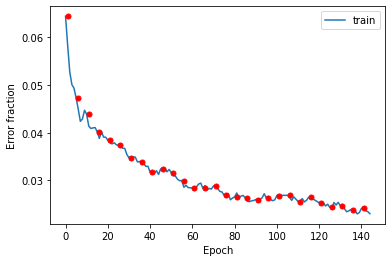

In [319]:
plt.plot(error[1:146],label = "train")
for i in range(1,146,5):
   plt.plot(i,error[i],marker='o', markersize=5, markerfacecolor= 'red', markeredgecolor = 'red')
plt.xlabel("Epoch")
plt.ylabel("Error fraction")
plt.legend()
plt.show()

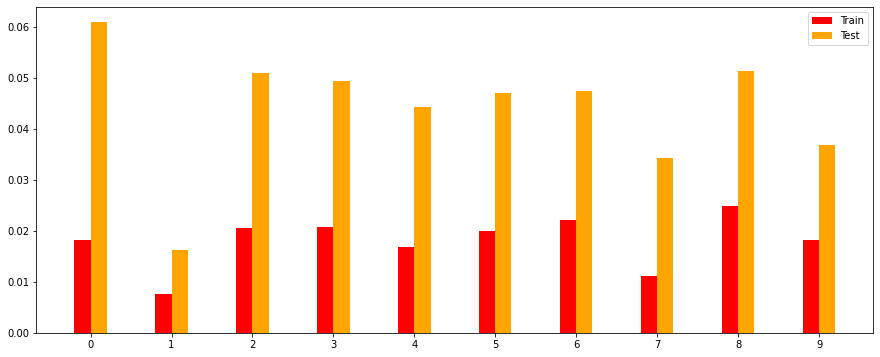

In [316]:
para = ['0','1','2','3','4','5','6','7','8','9']
width1 = 0.2
plt.figure(figsize=(15,6))
for i in range(9):
  plt.bar(para[i],error_plot_train[i],width=-width1,align='edge',color="red")
  plt.bar(para[i],error_plot_test[i],width=width1,align='edge',color="orange")
plt.bar(para[9],error_plot_train[9],width=-width1,align='edge',label="Train",color="red")
plt.bar(para[9],error_plot_test[9],width=width1,align='edge', label = "Test",color="orange")
plt.legend()
plt.show()

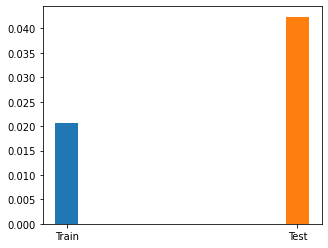

In [315]:
par = ['Train','Test']
plt.figure(figsize=(5,4))
plt.bar(par[0],error[0],width=0.1,label="Train")
plt.bar(par[1],error2[0],width=0.1,label="Test")
plt.show()

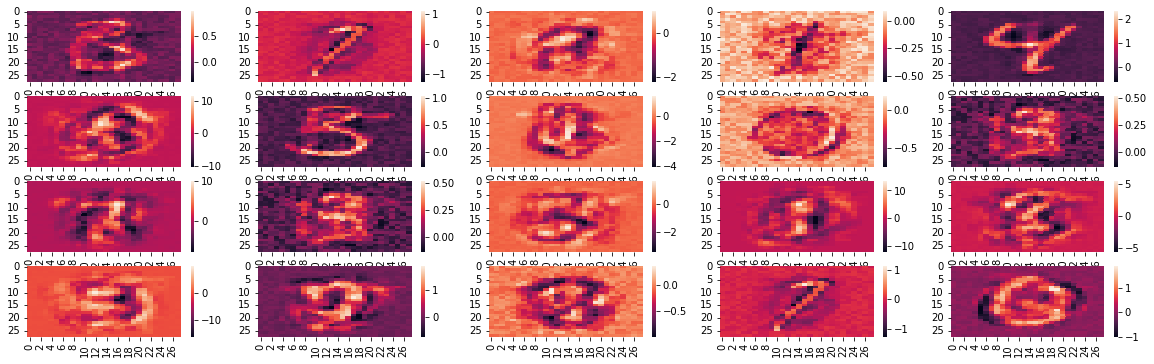

In [218]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15),(ax16,ax17,ax18,ax19,ax20)) = plt.subplots(4,5,figsize=(20,6))
bx1 = sns.heatmap(np.array(w1[36][1:]).reshape(28,28).T,ax=ax1)
bx2 = sns.heatmap(np.array(w1[50][1:]).reshape(28,28).T,ax=ax2)
bx3 = sns.heatmap(np.array(w1[2][1:]).reshape(28,28).T,ax=ax3)
bx4 = sns.heatmap(np.array(w1[59][1:]).reshape(28,28).T,ax=ax4)
bx5 = sns.heatmap(np.array(w1[5][1:]).reshape(28,28).T,ax=ax5)
bx6 = sns.heatmap(np.array(w1[66][1:]).reshape(28,28).T,ax=ax6)
bx7 = sns.heatmap(np.array(w1[3][1:]).reshape(28,28).T,ax=ax7)
bx8 = sns.heatmap(np.array(w1[69][1:]).reshape(28,28).T,ax=ax8)
bx9 = sns.heatmap(np.array(w1[21][1:]).reshape(28,28).T,ax=ax9)
bx10 = sns.heatmap(np.array(w1[28][1:]).reshape(28,28).T,ax=ax10)
bx11= sns.heatmap(np.array(w1[8][1:]).reshape(28,28).T,ax=ax11)
bx12 = sns.heatmap(np.array(w1[28][1:]).reshape(28,28).T,ax=ax12)
bx13 = sns.heatmap(np.array(w1[75][1:]).reshape(28,28).T,ax=ax13)
bx14 = sns.heatmap(np.array(w1[67][1:]).reshape(28,28).T,ax=ax14)
bx15 = sns.heatmap(np.array(w1[9][1:]).reshape(28,28).T,ax=ax15)
bx16 = sns.heatmap(np.array(w1[65][1:]).reshape(28,28).T,ax=ax16)
bx17 = sns.heatmap(np.array(w1[72][1:]).reshape(28,28).T,ax=ax17)
bx18 = sns.heatmap(np.array(w1[44][1:]).reshape(28,28).T,ax=ax18)
bx19 = sns.heatmap(np.array(w1[50][1:]).reshape(28,28).T,ax=ax19)
bx20 = sns.heatmap(np.array(w1[86][1:]).reshape(28,28).T,ax=ax20)
plt.show()

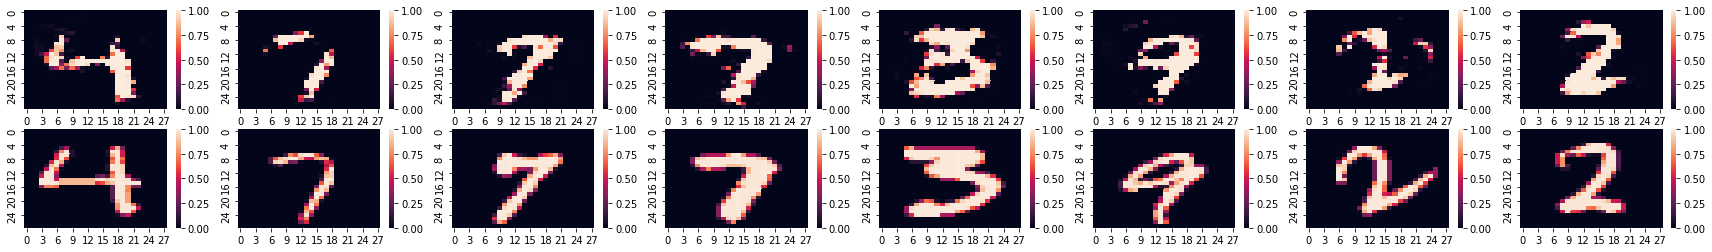

In [292]:
fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),(ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20)) = plt.subplots(2,8,figsize=(30,4))
bx1 = sns.heatmap(np.array(y_extra3[1]).reshape(28,28).T,ax=ax1)
bx2 = sns.heatmap(np.array(y_extra3[2]).reshape(28,28).T,ax=ax2)
bx3 = sns.heatmap(np.array(y_extra3[3]).reshape(28,28).T,ax=ax3)
bx4 = sns.heatmap(np.array(y_extra3[4]).reshape(28,28).T,ax=ax4)
bx5 = sns.heatmap(np.array(y_extra3[5]).reshape(28,28).T,ax=ax5)
bx6 = sns.heatmap(np.array(y_extra3[6]).reshape(28,28).T,ax=ax6)
bx7 = sns.heatmap(np.array(y_extra3[7]).reshape(28,28).T,ax=ax7)
bx8 = sns.heatmap(np.array(y_extra3[0]).reshape(28,28).T,ax=ax8)
bx13 = sns.heatmap(np.array(y_extra2[1][1:]).reshape(28,28).T,ax=ax13)
bx14 = sns.heatmap(np.array(y_extra2[2][1:]).reshape(28,28).T,ax=ax14)
bx15 = sns.heatmap(np.array(y_extra2[3][1:]).reshape(28,28).T,ax=ax15)
bx16 = sns.heatmap(np.array(y_extra2[4][1:]).reshape(28,28).T,ax=ax16)
bx17 = sns.heatmap(np.array(y_extra2[5][1:]).reshape(28,28).T,ax=ax17)
bx18 = sns.heatmap(np.array(y_extra2[6][1:]).reshape(28,28).T,ax=ax18)
bx19 = sns.heatmap(np.array(y_extra2[7][1:]).reshape(28,28).T,ax=ax19)
bx20 = sns.heatmap(np.array(y_extra2[0][1:]).reshape(28,28).T,ax=ax20)


plt.show()

In [222]:
w1_new = [0 for i in range(100)]
w2_new = [0 for i in range(100)]

In [227]:
w1_new = w1
w2_new = w2